# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [11]:
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv(1).csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [14]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)



,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [15]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias: Todas as categorias não tem médias exatamente iguais a mediana, porém destaco com mais discrepâncias são lacteos, congelados e frutas, o restante fica na média de 300 para cima ou para baixo da mediana

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [16]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


Digite nesse campo o comportamento que você identificou.

A categoria de lacteos e congelados acompanham a discrepância entre a média e a mediana com um desvio padrão bem alto.

Já beleza e cuidado surpreende com um desvio padrão bem alto porém com média e mediana próximas.

Frutas está com um desvio padrão baixo em comparação com a diferença da média e da mediana

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

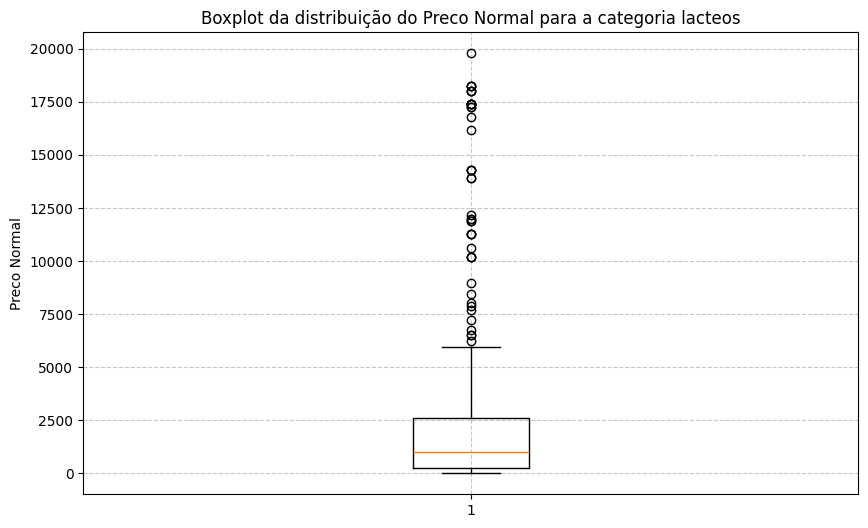

In [17]:
#Seu código aqui
plt.figure(figsize=(10, 6))
plt.boxplot(df.loc[df['Categoria'] == 'lacteos']['Preco_Normal'])


plt.title('Boxplot da distribuição do Preco Normal para a categoria lacteos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Preco Normal')
plt.show()

Podemos ver claramente que temos muitos outliers na categoria lacteos, a comparação da média com a mediana e a visualização do desvio padrão já nos indicava que existiam muitos outliers porém com o boxsplot podemos ver isso bem mais claramente

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [52]:
# Seu código aqui
media_descontos = df.groupby('Categoria')['Desconto'].sum().reset_index()


fig = px.bar(media_descontos, x='Desconto', y='Categoria', orientation='h', title='Média de descontos por categoria')
fig.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [59]:
# Seu código aqui
media_desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

fig = px.treemap(media_desconto_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Média de Desconto por Categoria e Marca',
                 color='Marca')
fig.show()

